In [1]:
from numpy import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import alsvinn_tools

import datetime
import socket
print("Generated on %s on %s" % (datetime.date.today(), socket.gethostname()))
errors=''

Generated on 2018-02-14 on eu-login-06


# Kelvin-Helmholtz

We run the Kelvin-Helmholtz instability for different resolutions

Remember that 2D FVM has a runtime of $$O(N^3)$$. We can not afford to allocate that many CPUs, so we always increase the amount of CPUs by a factor of 4, and measure the time per timestep

## With file output


core_counts['multix'] = [1, 4, 16, 64, 256]
runtimes['multix'] = [150000, 614000, 1609000, 6117000, 16612000]
runtimes_per_timestep['multix'] = [28.095148904289193, 54.514782917517536, 69.4192769005091, 126.95612469386909, 167.0185598520038]

core_counts['multiy'] = [1, 4, 16, 64, 256]
runtimes['multiy'] = [151000, 627000, 1810000, 4515000, 10493000]
runtimes_per_timestep['multiy'] = [28.282449896984453, 55.669004705673444, 78.09129346794374, 93.70719355776016, 105.49757696406668]

core_counts['multixmultiy'] = [1, 4]
runtimes['multixmultiy'] = [148000, 346000]
runtimes_per_timestep['multixmultiy'] = [27.72054691889867, 30.720056823226493]

Git revision: 29e4e53edc12ec2980b81550e3ffd966f1d3398f


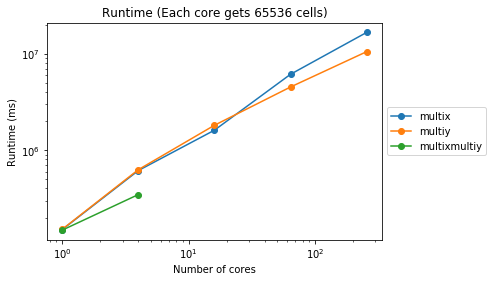

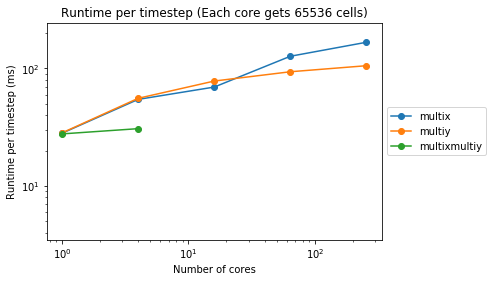

revisions= ['29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f', '29e4e53edc12ec2980b81550e3ffd966f1d3398f']

build_types: ['Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release', 'Release']


In [2]:
setups=['multix', 'multiy', 'multixmultiy']
build_types = []
revisions = []
for setup in setups:
    basename = '../runs/{setup}/2d/weak_scaling/kelvinhelmholtz_{N}/alsuqcli_kh_{N}_report.json'
    
    resolutions = [256, 512, 1024, 2048, 4096, 8192]
    runtimes = []
    runtimes_per_timestep = []
    core_counts = []
    for resolution in resolutions:
        try:
            report = basename.format(N=resolution, setup = setup)
            
            git_revision = alsvinn_tools.get_revision(report)
            revisions.append(git_revision)
            build_types.append(alsvinn_tools.get_build_type(report))
            runtime = alsvinn_tools.get_runtime(report)
            runtimes.append(runtime)
            
            cores = alsvinn_tools.get_total_cores(report)
            core_counts.append(cores)
            
            timesteps = alsvinn_tools.get_timesteps(report)
            runtimes_per_timestep.append(float(runtime)/timesteps)
        except Exception as e:
            errors +="Failed at resolution {N} with {setup}\n\n Skipping\n.".format(N=resolution, setup=setup)
            errors +=str(e) + '\n'
            
    try:
        if len(runtimes) == 0:
            continue
        plt.figure(0)
        plt.title("Runtime (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        plt.loglog(core_counts, runtimes, '-o',label=setup)
        plt.xlabel('Number of cores')
        plt.ylabel('Runtime (ms)')
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
        
        plt.figure(1)
        plt.title("Runtime per timestep (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        plt.loglog(core_counts, runtimes_per_timestep, '-o',label=setup)
        plt.ylim([min(runtimes_per_timestep)/8.0, max(runtimes_per_timestep)*8.0])
        plt.xlabel('Number of cores')
        plt.ylabel('Runtime per timestep (ms)')
        
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    except Exception as e:
        errors += "Failed at {setup}\n\n Skipping.".format(setup=setup) + '\n'
        errors += str(e) + '\n'
    
    print("core_counts['%s'] = %s" % (setup, core_counts))
    print("runtimes['%s'] = %s" % (setup, runtimes))
    print("runtimes_per_timestep['%s'] = %s" % (setup, runtimes_per_timestep))
    print("")
try:
    print("Git revision: %s" % git_revision )
    plt.show()
    print("revisions= %s" % revisions)
    print()
    print("build_types: %s" % build_types)
except Exception as e:
    errors+= str(e)+'\n'

## Without file output


In [3]:
setups=['multix', 'multiy', 'multixmultiy']
build_types = []
revisions = []
for setup in setups:
    basename = '../runs/{setup}/2d/weak_scaling_without_write/kelvinhelmholtz_{N}/alsuqcli_kh_{N}_report.json'
    
    resolutions = [256, 512, 1024, 2048, 4096, 8192]
    runtimes = []
    runtimes_per_timestep = []
    core_counts = []
    for resolution in resolutions:
        try:
            report = basename.format(N=resolution, setup = setup)
            
            git_revision = alsvinn_tools.get_revision(report)
            revisions.append(git_revision)
            build_types.append(alsvinn_tools.get_build_type(report))
            runtime = alsvinn_tools.get_runtime(report)
            runtimes.append(runtime)
            
            cores = alsvinn_tools.get_total_cores(report)
            core_counts.append(cores)
            
            timesteps = alsvinn_tools.get_timesteps(report)
            runtimes_per_timestep.append(float(runtime)/timesteps)
        except Exception as e:
            errors += "Failed at resolution {N} with {setup}\n\n Skipping.\n".format(N=resolution, setup=setup)
            errors += str(e) + '\n'
            
    try:
        if len(runtimes) == 0:
            continue
        plt.figure(0)
        plt.title("Runtime (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        plt.loglog(core_counts, runtimes, '-o',label=setup)
        plt.xlabel('Number of cores')
        plt.ylabel('Runtime (ms)')
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
        
        plt.figure(1)
        plt.title("Runtime per timestep (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        plt.loglog(core_counts, runtimes_per_timestep, '-o',label=setup)
        plt.xlabel('Number of cores')
        plt.ylim([min(runtimes_per_timestep)/8.0, max(runtimes_per_timestep)*8.0])
        plt.title("Runtime per timestep (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    except Exception as e:
        errors += "Failed at {setup}\n\n Skipping.\n".format(setup=setup)
        errors += str(e) + '\n'
    
    print("core_counts['%s'] = %s" % (setup, core_counts))
    print("runtimes['%s'] = %s" % (setup, runtimes))
    print("runtimes_per_timestep['%s'] = %s" % (setup, runtimes_per_timestep))
    print("")
try:
    print("Git revision: %s" % git_revision )
    plt.show()
    print("revisions= %s" % revisions)
    print()
    print("build_types: %s" % build_types)
except Exception as e:
    errors += str(e) + '\n'

Git revision: 29e4e53edc12ec2980b81550e3ffd966f1d3398f
revisions= []

build_types: []


In [4]:
import os
cmakeCache = '../alsvinn/build/CMakeCache.txt'
if os.path.exists(cmakeCache):
    with open(cmakeCache, 'r') as f:
        print(f.read())

# This is the CMakeCache file.
# For build in directory: /cluster/scratch/klye/alsvinn_scalings/alsvinn/build
# It was generated by CMake: /cluster/home/klye/local_cmake/bin/cmake
# You can edit this file to change values found and used by cmake.
# If you do not want to change any of the values, simply exit the editor.
# If you do want to change a value, simply edit, save, and exit the editor.
# The syntax for the file is as follows:
# KEY:TYPE=VALUE
# KEY is the name of a variable in the cache.
# TYPE is a hint to GUIs for the type of VALUE, DO NOT EDIT TYPE!.
# VALUE is the current value for the KEY.

########################
# EXTERNAL cache entries
########################

//Build doxygen documentation
ALSVINN_BUILD_DOXYGEN:BOOL=OFF

//Build unittests (requires Gtest). HIGHLY recommended!
ALSVINN_BUILD_TESTS:BOOL=OFF

//CXX flags to use
ALSVINN_CXX_FLAGS:STRING=

//Use NVidia's GPU direct to do MPI transfers (this is faster,
// but not only available)
ALSVINN_MPI_GPU_DIRECT:BOOL=O

In [5]:
print(errors)

Failed at resolution 8192 with multix

 Skipping
.[Errno 2] No such file or directory: '../runs/multix/2d/weak_scaling/kelvinhelmholtz_8192/alsuqcli_kh_8192_report.json'
Failed at resolution 8192 with multiy

 Skipping
.[Errno 2] No such file or directory: '../runs/multiy/2d/weak_scaling/kelvinhelmholtz_8192/alsuqcli_kh_8192_report.json'
Failed at resolution 1024 with multixmultiy

 Skipping
.[Errno 2] No such file or directory: '../runs/multixmultiy/2d/weak_scaling/kelvinhelmholtz_1024/alsuqcli_kh_1024_report.json'
Failed at resolution 2048 with multixmultiy

 Skipping
.[Errno 2] No such file or directory: '../runs/multixmultiy/2d/weak_scaling/kelvinhelmholtz_2048/alsuqcli_kh_2048_report.json'
Failed at resolution 4096 with multixmultiy

 Skipping
.[Errno 2] No such file or directory: '../runs/multixmultiy/2d/weak_scaling/kelvinhelmholtz_4096/alsuqcli_kh_4096_report.json'
Failed at resolution 8192 with multixmultiy

 Skipping
.[Errno 2] No such file or directory: '../runs/multixmultiy